# Math 189 - Gender and Major Selection: Unveiling Trends at UC Campuses


# Research Question

How do gender enrollment and graduation trends in Computer Science programs at UC schools near major tech hubs (UCB, UCLA, UCSD, UCD, UCSC) compare to those at UCs located farther from these hubs (UCSB, UCR, UCM, UCI) from 2017 to 2022?

## Background and Prior Work

# Hypothesis


# Data

## Data overview

- Dataset #1
  - Dataset Name: DataUSA Datasets on Graduates’ Majors
  - Link to the dataset: https://datausa.io/search/?dimension=University (General Source)
    - We have 18 sub-datasets in total
      - UC Berkeley: https://docs.google.com/spreadsheets/d/1mWQo9-sF1Gv0EzZAiJNDFJ1GXFRtW2ExmL3Xh5oqC94/edit?gid=0#gid=0
      - UC Davis: https://docs.google.com/spreadsheets/d/1mWLnTyUHzo9cedWqUYC-CKvT8ctdReJVNEy-4YPvMpM/edit?gid=0#gid=0
      - UCLA: https://docs.google.com/spreadsheets/d/1TEjgqAb6DKOZlwCFm1TxNvTi7C2lo-02YMeDB7PXUJE/edit?gid=0#gid=0
      - UC Irvine: https://docs.google.com/spreadsheets/d/1n3frMOAKWhKPswrZlVjLlHyVkGpGPJlHz-_TmfU5dH8/edit?usp=sharing 
      - UC San Diego: https://docs.google.com/spreadsheets/d/14HsxrRD9Srs2cLC_pV1BlsBPonxbwaEhcphnqL5D4WM/edit?gid=275689308#gid=275689308 
      - UC Santa Barbra: https://docs.google.com/spreadsheets/d/1AdzX2m0Xb5HcYrh3MVfqP0ruBG0DtGG3uZP1QqMXG_Y/edit?usp=sharing 
      - UC Riverside: https://docs.google.com/spreadsheets/d/1WNtmMvjnsUffPmcSkbZhrb8-l2b9qfI8seH94i2Vylk/edit?gid=604871786#gid=604871786 
      - UC Santa Cruz: https://docs.google.com/spreadsheets/d/11XbxM0u-ZahWgqercf9cQjkbeqzRiLlpCcMlRJgZMIQ/edit?gid=0#gid=0 
      - UC Merced: https://docs.google.com/spreadsheets/d/142Jrv9n4m89BffdyU_xgsMTKLMDTeJtW-OQdI0Vhb5M/edit?usp=sharing 
https://datausa.io/profile/university/university-of-california-merced#graduates  

  - Number of observations: 19460 (combined 9 schools and both genders)
  - Number of variables: 5 (Major, Year, University, Gender, Completions)

**Important Variables:**
- Year (int): The year of graduation, ranging from 2017 to 2022.
- CIP6 (string): The Classification of Instructional Programs (CIP) code that categorizes the major titles. This variable will be used to identify whether a major belongs to "STEM" or "Social Science" based on predefined keywords.
- Completion (int): The number of degrees completed in each major.
- University (string): The name of the university where the students graduated.
- Gender (string): Men and Women

**Concepts:**
- CIP6 codes serve as proxies for categorizing majors into "STEM" or "Social Science."
- Completion metrics reflect the number of graduates in each major.

**Data Integration:**

The datasets across the nine schools provide a detailed understanding of each graduating class from 2017 to 2022 by gender. Initially, these datasets contained variables such as the declared major name, number of completed students, university name, and gender. After cleaning, we focus on essential variables: ‘Year’ (int), ‘CIP6’ (string), ‘University’ (string), and ‘Completion’ (int) that are important to our research question. We concatenated the cleaned male and female datasets from all nine UC campuses into one large dataframe. This unified dataset will include all necessary variables for future analysis, enabling a comprehensive examination of gender differences in major choices across UC schools.

## DataUSA Datasets on Graduates’ Majors (separated by gender)

In [1]:
%pip install pandas
%pip install requests

import pandas as pd
import requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install seaborn
%pip install patsy
%pip install statsmodels

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# read in female datasets from 9 campuses
response = requests.get('http://elpaso-app.datausa.io/api/data?University=110635&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucb_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110662&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucla_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110653&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_uci_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110705&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucsb_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110680&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucsd_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110714&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucsc_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110644&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucd_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=445188&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucm_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110671&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=2')
data = response.json()
df_ucr_f = pd.json_normalize(data['data'])

frames = [df_ucb_f, df_ucla_f, df_uci_f, df_ucsb_f, df_ucsd_f, df_ucsc_f, df_ucd_f, df_ucm_f, df_ucr_f]
result_female = pd.concat(frames)
result_female

,ID CIP6,CIP6,ID Year,Year,ID University,University,ID Gender,Gender,Completions,Slug University,Slug CIP6
0,260406,Cellular & Molecular Biology,2021,2021,110635,University of California-Berkeley,2,Women,555,university-of-california-berkeley,cellular-molecular-biology
1,260406,Cellular & Molecular Biology,2022,2022,110635,University of California-Berkeley,2,Women,535,university-of-california-berkeley,cellular-molecular-biology
2,260406,Cellular & Molecular Biology,2020,2020,110635,University of California-Berkeley,2,Women,474,university-of-california-berkeley,cellular-molecular-biology
3,260406,Cellular & Molecular Biology,2019,2019,110635,University of California-Berkeley,2,Women,424,university-of-california-berkeley,cellular-molecular-biology
4,450603,Econometrics & Quantitative Economics,2021,2021,110635,University of California-Berkeley,2,Women,383,university-of-california-berkeley,econometrics-quantitative-economics
...,...,...,...,...,...,...,...,...,...,...,...
862,520301,Accounting,2021,2021,110671,University of California-Riverside,2,Women,0,university-of-california-riverside,accounting-520301
863,520301,Accounting,2022,2022,110671,University of California-Riverside,2,Women,0,university-of-california-riverside,accounting-520301
864,520601,Business & Managerial Economics,2021,2021,110671,University of California-Riverside,2,Women,0,university-of-california-riverside,business-managerial-economics
865,520601,Business & Managerial Economics,2022,2022,110671,University of California-Riverside,2,Women,0,university-of-california-riverside,business-managerial-economics


In [4]:
# read in male datasets for 9 campuses
response = requests.get('http://elpaso-app.datausa.io/api/data?University=110635&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucb_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110662&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucla_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110653&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_uci_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110705&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucsb_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110680&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucsd_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110714&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucsc_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110644&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucd_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=445188&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucm_f = pd.json_normalize(data['data'])

response = requests.get('http://elpaso-app.datausa.io/api/data?University=110671&measures=Completions&drilldowns=CIP6&order=Completions&sort=desc&Gender=1')
data = response.json()
df_ucr_f = pd.json_normalize(data['data'])

frames = [df_ucb_f, df_ucla_f, df_uci_f, df_ucsb_f, df_ucsd_f, df_ucsc_f, df_ucd_f, df_ucm_f, df_ucr_f]
result_male = pd.concat(frames)
result_male


,ID CIP6,CIP6,ID Year,Year,ID University,University,ID Gender,Gender,Completions,Slug University,Slug CIP6
0,110701,Computer Science,2020,2020,110635,University of California-Berkeley,1,Men,658,university-of-california-berkeley,computer-science-110701
1,141001,Electrical & Electronics Engineering,2022,2022,110635,University of California-Berkeley,1,Men,646,university-of-california-berkeley,electrical-electronics-engineering
2,110701,Computer Science,2022,2022,110635,University of California-Berkeley,1,Men,640,university-of-california-berkeley,computer-science-110701
3,110701,Computer Science,2021,2021,110635,University of California-Berkeley,1,Men,621,university-of-california-berkeley,computer-science-110701
4,520201,General Business Administration & Management,2015,2015,110635,University of California-Berkeley,1,Men,610,university-of-california-berkeley,general-business-administration-management
...,...,...,...,...,...,...,...,...,...,...,...
862,520301,Accounting,2020,2020,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
863,520301,Accounting,2021,2021,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
864,520301,Accounting,2022,2022,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
865,520601,Business & Managerial Economics,2021,2021,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,business-managerial-economics


In [5]:
#concatenate both gender into one dataset
all_data = [result_female, result_male]
result_all = pd.concat(all_data)
result_all

,ID CIP6,CIP6,ID Year,Year,ID University,University,ID Gender,Gender,Completions,Slug University,Slug CIP6
0,260406,Cellular & Molecular Biology,2021,2021,110635,University of California-Berkeley,2,Women,555,university-of-california-berkeley,cellular-molecular-biology
1,260406,Cellular & Molecular Biology,2022,2022,110635,University of California-Berkeley,2,Women,535,university-of-california-berkeley,cellular-molecular-biology
2,260406,Cellular & Molecular Biology,2020,2020,110635,University of California-Berkeley,2,Women,474,university-of-california-berkeley,cellular-molecular-biology
3,260406,Cellular & Molecular Biology,2019,2019,110635,University of California-Berkeley,2,Women,424,university-of-california-berkeley,cellular-molecular-biology
4,450603,Econometrics & Quantitative Economics,2021,2021,110635,University of California-Berkeley,2,Women,383,university-of-california-berkeley,econometrics-quantitative-economics
...,...,...,...,...,...,...,...,...,...,...,...
862,520301,Accounting,2020,2020,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
863,520301,Accounting,2021,2021,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
864,520301,Accounting,2022,2022,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,accounting-520301
865,520601,Business & Managerial Economics,2021,2021,110671,University of California-Riverside,1,Men,0,university-of-california-riverside,business-managerial-economics


In [6]:
#drop unnecessary columns
result_all = result_all.drop(['ID CIP6', 'ID Year', 'ID University', 'ID Gender', 'Slug University', 'Slug CIP6'], axis=1)
result_all

,CIP6,Year,University,Gender,Completions
0,Cellular & Molecular Biology,2021,University of California-Berkeley,Women,555
1,Cellular & Molecular Biology,2022,University of California-Berkeley,Women,535
2,Cellular & Molecular Biology,2020,University of California-Berkeley,Women,474
3,Cellular & Molecular Biology,2019,University of California-Berkeley,Women,424
4,Econometrics & Quantitative Economics,2021,University of California-Berkeley,Women,383
...,...,...,...,...,...
862,Accounting,2020,University of California-Riverside,Men,0
863,Accounting,2021,University of California-Riverside,Men,0
864,Accounting,2022,University of California-Riverside,Men,0
865,Business & Managerial Economics,2021,University of California-Riverside,Men,0


In [7]:
#change column name 
df=result_all.rename(columns={'CIP6': 'Major'})
df
df.to_csv('output.csv', index=False)

In [8]:
#convert Year(string) to datatype int
df['Year']=df['Year'].astype(int)

In [9]:
#select years from 2017 to 2022 and filter out completions that are 0
df = df[(df['Year']>=2017)&(df['Year'] <=2022)&(df['Completions'] > 0)]
df.to_csv('output.csv', index=False)

In [10]:
df.isna().any()

Major          False
Year           False
University     False
Gender         False
Completions    False
dtype: bool

# Results

## Exploratory Data Analysis

## Section 1 of EDA - Compare the number of Computer Science majors between gender

In [11]:
df['Major'].unique()

array(['Cellular & Molecular Biology',
       'Econometrics & Quantitative Economics', 'General Public Health',
       'General Business Administration & Management',
       'Other Computer & Information Sciences',
       'General Political Science & Government', 'General Economics',
       'Other Research & Experimental Psychology', 'General Psychology',
       'Sociology', 'Computer Science', 'Management Science',
       'Programs for Foreign Lawyers', 'Law', 'Cognitive Science',
       'Social Work', 'General English Language & Literature',
       'General Biological Sciences',
       'Electrical & Electronics Engineering', 'Other Social Sciences',
       'General Civil Engineering', 'General Legal Studies',
       'General Statistics', 'Information Science', 'Operations Research',
       'General Applied Mathematics', 'International & Global Studies',
       'General Chemistry', 'Mechanical Engineering',
       'Bioengineering & Biomedical Engineering',
       'General Advanced Leg

In [12]:
df[df['Major'].str.contains("Computer")]

,Major,Year,University,Gender,Completions
24,Other Computer & Information Sciences,2022,University of California-Berkeley,Women,327
44,Other Computer & Information Sciences,2021,University of California-Berkeley,Women,279
53,Computer Science,2022,University of California-Berkeley,Women,263
63,Computer Science,2020,University of California-Berkeley,Women,239
64,Computer Science,2021,University of California-Berkeley,Women,235
...,...,...,...,...,...
179,General Computer Engineering,2018,University of California-Riverside,Men,53
180,General Computer Engineering,2020,University of California-Riverside,Men,53
212,General Computer Engineering,2017,University of California-Riverside,Men,46
213,General Computer Engineering,2022,University of California-Riverside,Men,46


<Axes: xlabel='Year', ylabel='Completions'>

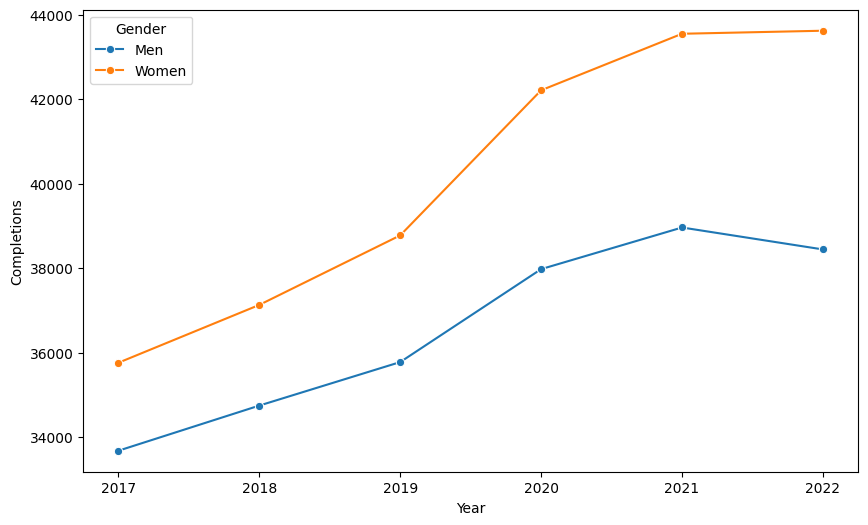

In [13]:
#general trend between genders
gender_yearly_trend = df.groupby(['Year', 'Gender'])['Completions'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_yearly_trend, x='Year', y='Completions', hue='Gender', marker='o')

In [14]:
tech_hub_universities = ["University of California-Berkeley", "University of California-San Diego",
                          "University of California-Davis", "University of California-Santa Cruz", 
                          "University of California-Los Angeles"]
non_tech_hub_universities = ["University of California-Irvine", "University of California-Santa Barbara",
                              "University of California-Merced", "University of California-Riverside"]

df['Near_tech_Hub'] = df['University'].apply(lambda x: "Yes" if x in tech_hub_universities else "No")
grouped_df = df.groupby(['Year', 'Gender', 'Near_tech_Hub'])['Completions'].sum().reset_index()
grouped_df

,Year,Gender,Near_tech_Hub,Completions
0,2017,Men,No,21726
1,2017,Men,Yes,11946
2,2017,Women,No,22771
3,2017,Women,Yes,12986
4,2018,Men,No,22142
5,2018,Men,Yes,12600
6,2018,Women,No,23464
7,2018,Women,Yes,13664
8,2019,Men,No,22749
9,2019,Men,Yes,13024


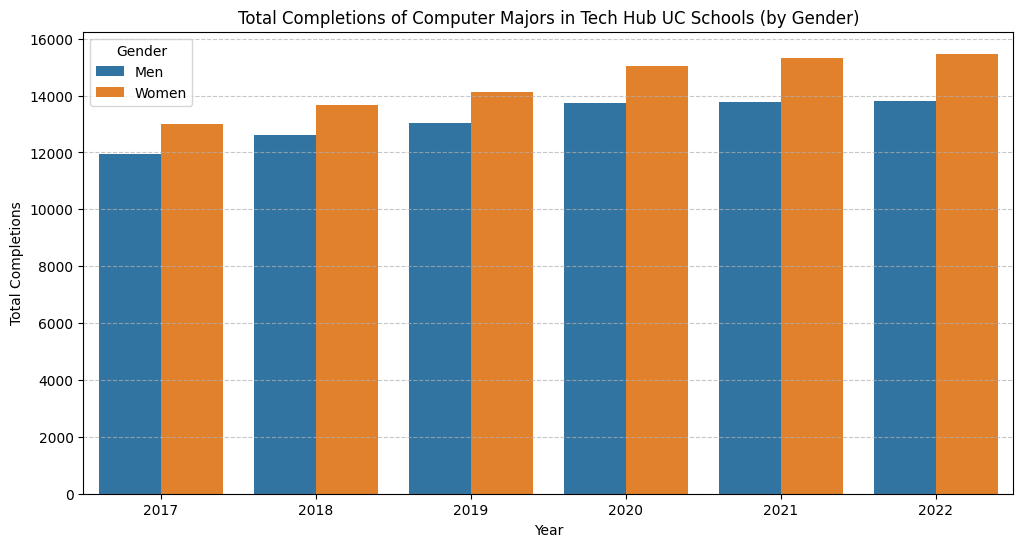

In [15]:
tech_hub_data = grouped_df[grouped_df['Near_tech_Hub'] == "Yes"]

plt.figure(figsize=(12, 6))
sns.barplot(data=tech_hub_data, x='Year', y='Completions', hue='Gender')

# Customize the plot
plt.title("Total Completions of Computer Majors in Tech Hub UC Schools (by Gender)")
plt.xlabel("Year")
plt.ylabel("Total Completions")
plt.legend(title="Gender")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the plot
plt.show()

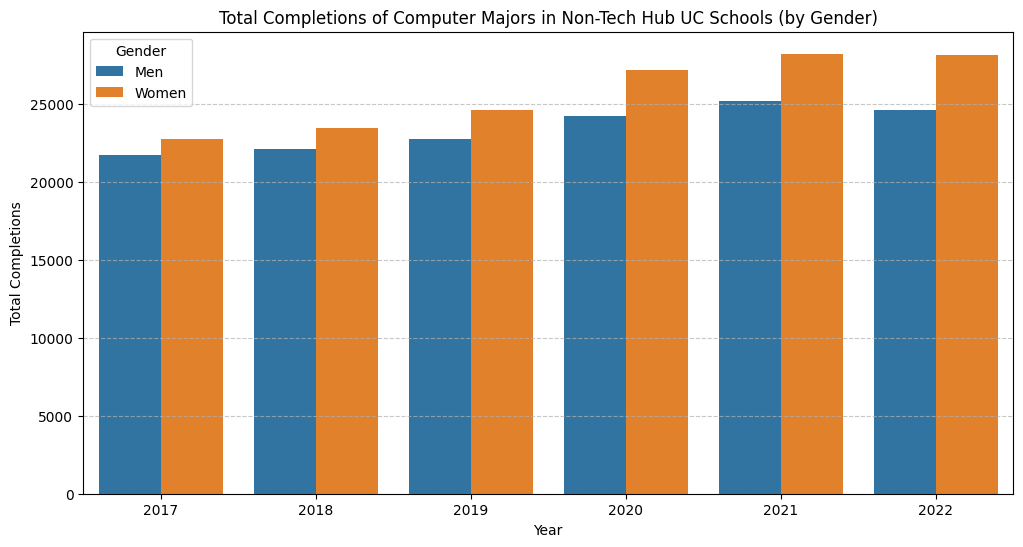

In [16]:
non_tech_hub_data = grouped_df[grouped_df['Near_tech_Hub'] == "No"]

plt.figure(figsize=(12, 6))
sns.barplot(data=non_tech_hub_data, x='Year', y='Completions', hue='Gender')

# Customize the plot
plt.title("Total Completions of Computer Majors in Non-Tech Hub UC Schools (by Gender)")
plt.xlabel("Year")
plt.ylabel("Total Completions")
plt.legend(title="Gender")
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the plot
plt.show()

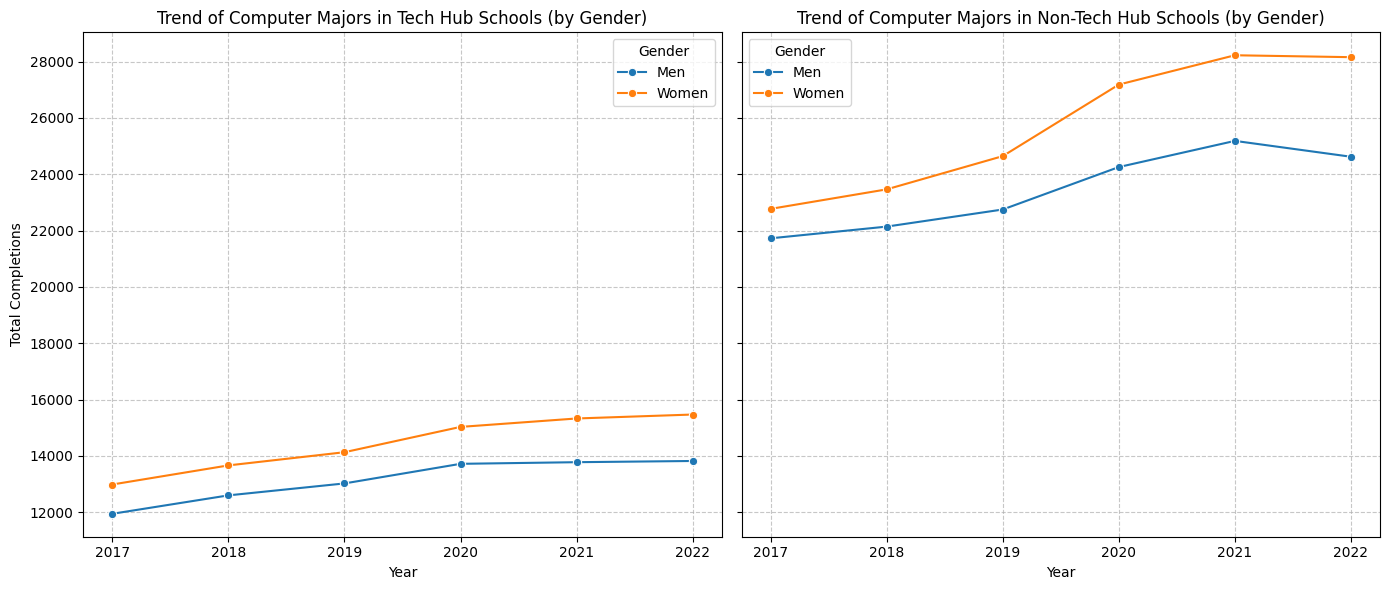

In [17]:
#line graphs comparsion for UC schools near tech hub and not near tech hub

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Tech Hub Schools
sns.lineplot(data=tech_hub_data, x='Year', y='Completions', hue='Gender', marker='o', ax=axes[0])
axes[0].set_title("Trend of Computer Majors in Tech Hub Schools (by Gender)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Total Completions")
axes[0].legend(title="Gender")
axes[0].grid(True, linestyle="--", alpha=0.7)

# Plot for Non-Tech Hub Schools
sns.lineplot(data=non_tech_hub_data, x='Year', y='Completions', hue='Gender', marker='o', ax=axes[1])
axes[1].set_title("Trend of Computer Majors in Non-Tech Hub Schools (by Gender)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Total Completions")
axes[1].legend(title="Gender")
axes[1].grid(True, linestyle="--", alpha=0.7)

# Display the plots
plt.tight_layout()
plt.show()


#interpretation

## Section 2 of EDA - Compare the number of computer completion in UC schools near Tech hub and not near Tech hub within Gender

In [18]:
df

,Major,Year,University,Gender,Completions,Near_tech_Hub
0,Cellular & Molecular Biology,2021,University of California-Berkeley,Women,555,Yes
1,Cellular & Molecular Biology,2022,University of California-Berkeley,Women,535,Yes
2,Cellular & Molecular Biology,2020,University of California-Berkeley,Women,474,Yes
3,Cellular & Molecular Biology,2019,University of California-Berkeley,Women,424,Yes
4,Econometrics & Quantitative Economics,2021,University of California-Berkeley,Women,383,Yes
...,...,...,...,...,...,...
775,Other Dance,2021,University of California-Riverside,Men,1,No
780,Other Music,2021,University of California-Riverside,Men,1,No
781,Other Music,2022,University of California-Riverside,Men,1,No
782,Accounting,2018,University of California-Riverside,Men,1,No


In [19]:
uc_trend = df.groupby(['Year', 'Gender', 'University', 'Near_tech_Hub'])['Completions'].sum().reset_index()
uc_trend

,Year,Gender,University,Near_tech_Hub,Completions
0,2017,Men,University of California-Berkeley,Yes,5826
1,2017,Men,University of California-Davis,Yes,4021
2,2017,Men,University of California-Irvine,No,4350
3,2017,Men,University of California-Los Angeles (110662),No,6212
4,2017,Men,University of California-Merced,No,659
...,...,...,...,...,...
103,2022,Women,University of California-Merced,No,1188
104,2022,Women,University of California-Riverside,No,3754
105,2022,Women,University of California-San Diego (110680),No,5818
106,2022,Women,University of California-Santa Barbara,No,3554


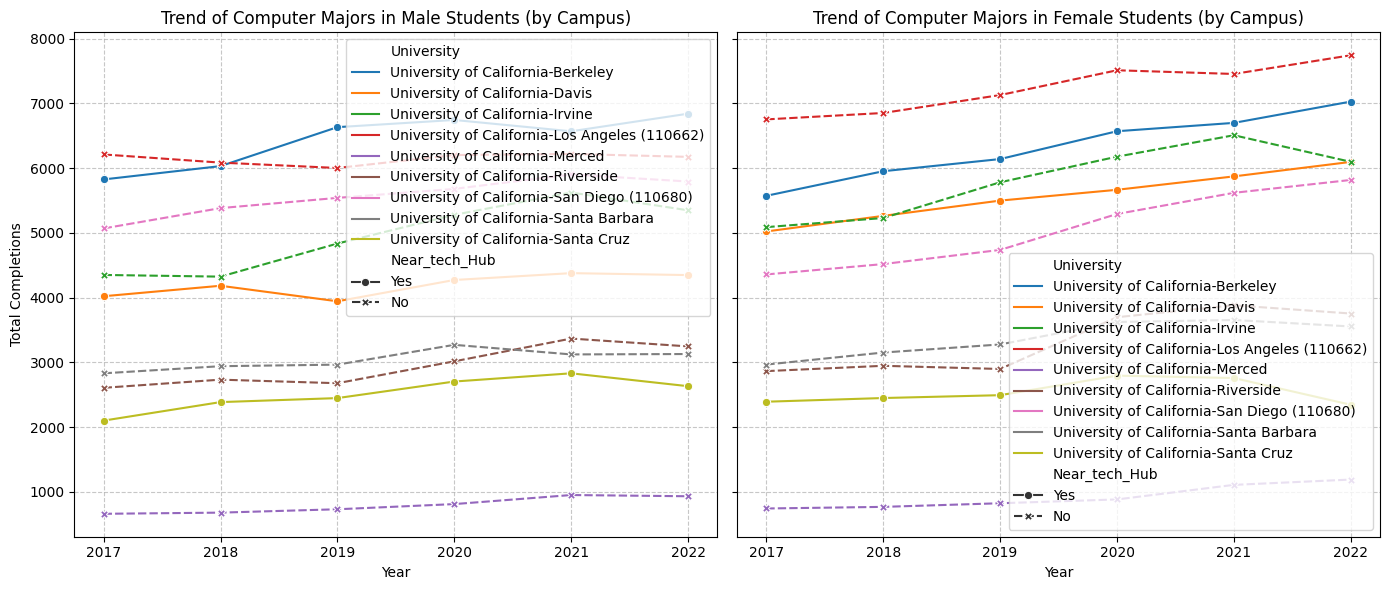

In [20]:
male_data = uc_trend[uc_trend['Gender'] == "Men"]
female_data = uc_trend[uc_trend['Gender'] == "Women"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Male Students
sns.lineplot(data=male_data, x='Year', y='Completions', hue='University', style='Near_tech_Hub', markers=True, ax=axes[0])
axes[0].set_title("Trend of Computer Majors in Male Students (by Campus)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Total Completions")
axes[0].grid(True, linestyle="--", alpha=0.7)

# Plot for Female Students
sns.lineplot(data=female_data, x='Year', y='Completions', hue='University', style='Near_tech_Hub', markers=True, ax=axes[1])
axes[1].set_title("Trend of Computer Majors in Female Students (by Campus)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Total Completions")
axes[1].grid(True, linestyle="--", alpha=0.7)

# Display the plots
plt.tight_layout()
plt.show()

#Interpretation

## Section 3 of EDA - Specific Major Counts between Gender

In [21]:
# Group data by Major and Gender, then sum the completions
major_gender_counts = df.groupby(['Major', 'Gender'])['Completions'].sum().reset_index()

major_gender_counts

,Major,Gender,Completions
0,Accounting,Men,237
1,Accounting,Women,459
2,Acting,Men,25
3,Acting,Women,23
4,Actuarial Science,Men,594
...,...,...,...
683,"Veterinary Preventative Medicine, Epidemiology...",Women,11
684,Vision Science & Physiological Optics,Men,15
685,Vision Science & Physiological Optics,Women,28
686,Zoology,Men,115


In [22]:
# Pivot the table
major_gender_pivot = major_gender_counts.pivot(
    index = 'Major', 
    columns = 'Gender', 
    values = 'Completions'
).fillna(0)

major_gender_pivot

Gender,Men,Women
Major,,
Accounting,237.0,459.0
Acting,25.0,23.0
Actuarial Science,594.0,367.0
"Aerospace, Aeronautical, & Astronautical Engineering",1630.0,298.0
Agricultural Engineering,39.0,34.0
...,...,...
Urban Studies,328.0,455.0
Veterinary Medicine,71.0,331.0
"Veterinary Preventative Medicine, Epidemiology, & Public Health",8.0,11.0


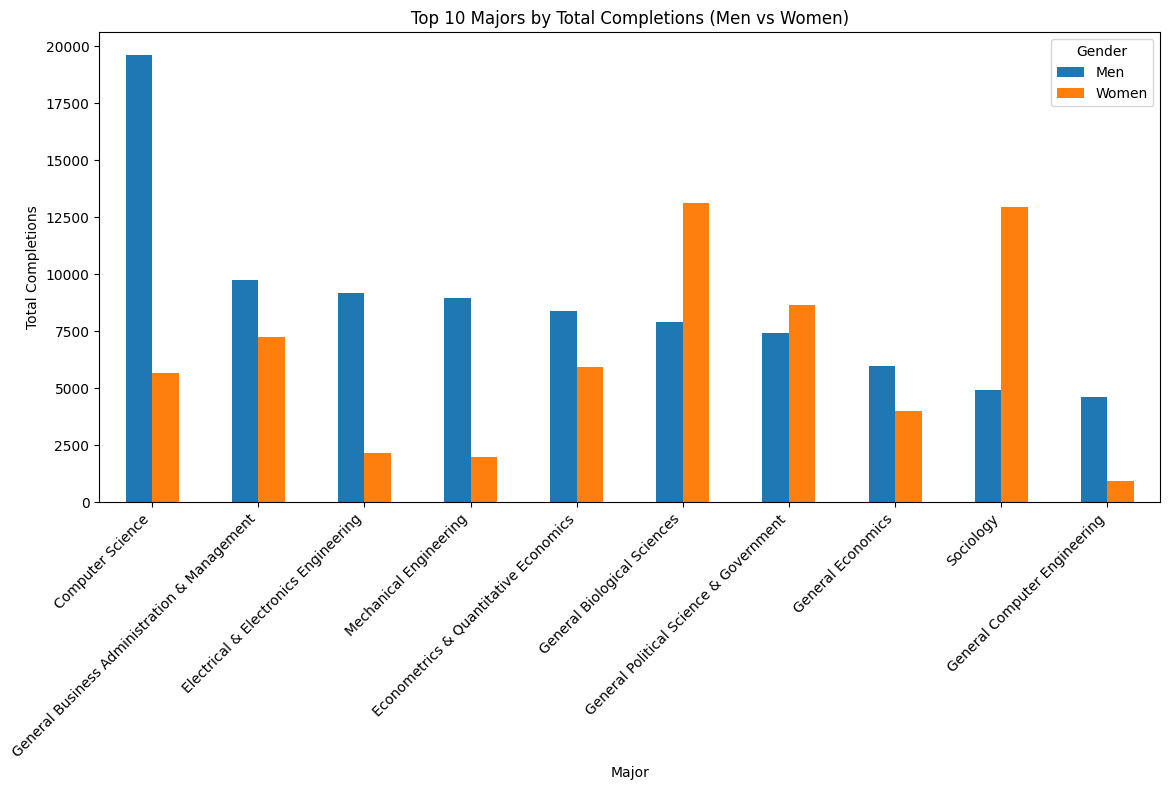

In [23]:
major_gender_pivot_sorted = major_gender_pivot.sort_values(by = 'Men', ascending = False)

# Plot a bar chart for the top 10 majors
major_gender_pivot_sorted.head(10).plot(kind = 'bar', figsize = (12,8))
plt.title('Top 10 Majors by Total Completions (Men vs Women)')
plt.xlabel('Major')
plt.ylabel('Total Completions')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

From the tables above, men are more likely to choose STEM majors such as Computer Science, Electrical & Electronics Engineering, Mechanical Engineering, and Quantitative Economics, with a particularly significant preference for Computer Science. Additionally, they are more inclined to select Social Science majors like Business Administration, Political Science, and General Economics.

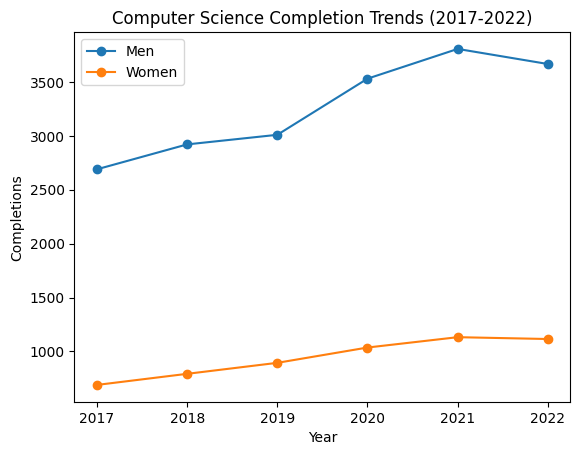

In [24]:
major_year_gender = df.groupby(['Major', 'Gender', 'Year'])['Completions'].sum().reset_index()

# For instance, filter for Computer Science to visualize its trend
cs_trend = major_year_gender[major_year_gender['Major'] == 'Computer Science']

# Plot the trend over time for Computer Science completions by gender
for gender in cs_trend['Gender'].unique():
    subset = cs_trend[cs_trend['Gender'] == gender]
    plt.plot(subset['Year'], subset['Completions'], marker = 'o', label = gender)

plt.title('Computer Science Completion Trends (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Completions')
plt.legend()
plt.xticks(cs_trend['Year'].unique())
plt.show()

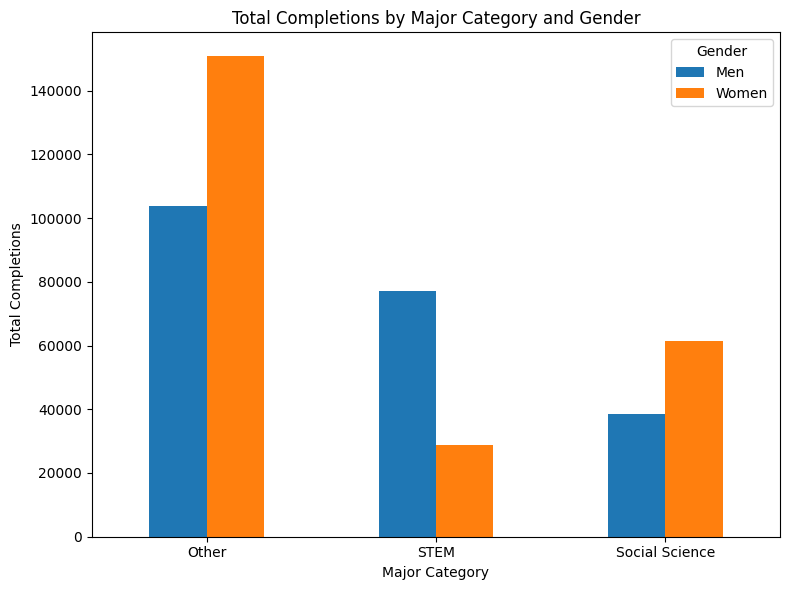

In [25]:
def classify_major(major):
    if any(keyword in major for keyword in ['Computer', 'Engineering', 'Math', 'Physics']):
        return 'STEM'
    elif any(keyword in major for keyword in ['Economics', 'History', 'Social', 'Psychology', 'Sociology']):
        return 'Social Science'
    else:
        return 'Other'

df['Major_Category'] = df['Major'].apply(classify_major)

category_counts = df.groupby(['Major_Category', 'Gender'])['Completions'].sum().reset_index()

# Pivot for visualization
category_pivot = category_counts.pivot(
    index = 'Major_Category', 
    columns = 'Gender',
    values = 'Completions'
).fillna(0)

# Plot the grouped counts for each category
category_pivot.plot(kind = 'bar', figsize = (8,6))
plt.title('Total Completions by Major Category and Gender')
plt.xlabel('Major Category')
plt.ylabel('Total Completions')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

From the tables above, women are more likely to choose stem majors like General Biological Sciences, Econometrics & Quantitative Economics, Computer Science, and Cellular & Molecular Biology. They are also more likely to choose Sociology, General Psychology, and Political Science for Social Science.

# Hypothesis Testing and Regression Analysis

In this part of our analysis, we are interested in understanding how various variables influence the choice of different fields of study. To do this, we will do regression analysis and hypothesis testing.

We must check our assumptions of normality, independence, homoscadasticity, and linearity are satistified in order to ensure our regression analysis is valid.

We will check every one of these assumptions for each ordinary linear regression analysis using the below functions.

In [26]:
# function to check for normality using Shapiro-Wilk test
from scipy.stats import shapiro
def normality(model, alpha = 0.05):
    sw_test = shapiro(model.resid)
    if sw_test.pvalue > alpha:
        print(f'Fail to reject H0, the data is likely normally distributed (p-value={sw_test.pvalue}, alpha = {alpha})')
    else:
        print(f'Reject H0, the data is likely not normally distributed (p-value={sw_test.pvalue}, alpha = {alpha})')

In [27]:
# function to check for hetroscedasticity and linearity by plotting residuals against fitted values

def hetro_and_linear(model):
    fitted = model.fittedvalues
    residuals = model.resid
    sns.scatterplot(x=fitted, y=residuals, alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.xlabel("Fitted Values")
    plt.ylabel("Residual")
    plt.title("Residuals vs. Fitted Values")
    plt.show()


In [28]:
# function to check for independence by plotting the ACF fucntion against the residuals
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
def independence(model):
    residuals = model.resid

    plot_acf(residuals, lags=20, alpha=0.05)
    plt.title("Autocorrelation of Residuals (ACF Plot)")
    plt.xlabel("Lags")
    plt.ylabel("Autocorrelation")
    plt.show()


##

## Impacts of gender, the year, and the University on Computer Science Major Completions

In [29]:
def label_field(major):
    major_lower = major.lower()
    computer_keywords = ['computer']
    
    if any(keyword in major_lower for keyword in computer_keywords):
        return 'Computer Science'
    else:
        return 'Other'

df['Field'] = df['Major'].apply(label_field)

df_stem = df[df['Field'] == 'Computer Science'].copy()

analysis = df_stem.groupby(
    ['University', 'Gender', 'Year'],
    as_index = False
)['Completions'].sum()

model = smf.ols(formula = 'Completions ~ C(Gender) + Year + C(University)', data = analysis).fit()

### Diagnostics

**Normality**

In [30]:
normality(model)

Reject H0, the data is likely not normally distributed (p-value=0.018228334961703452, alpha = 0.05)


**Heteroscedasticity and Linearity**

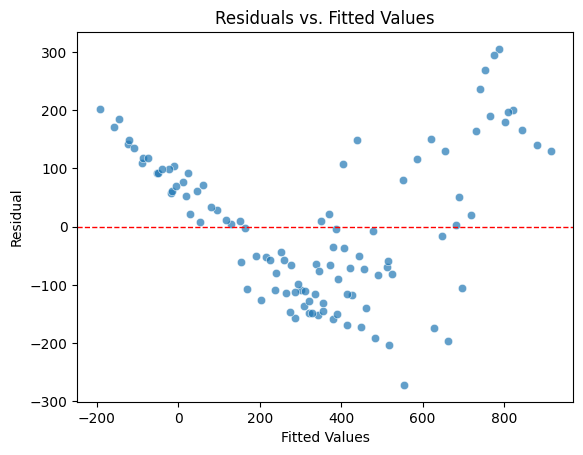

In [31]:
hetro_and_linear(model)

**Independence**

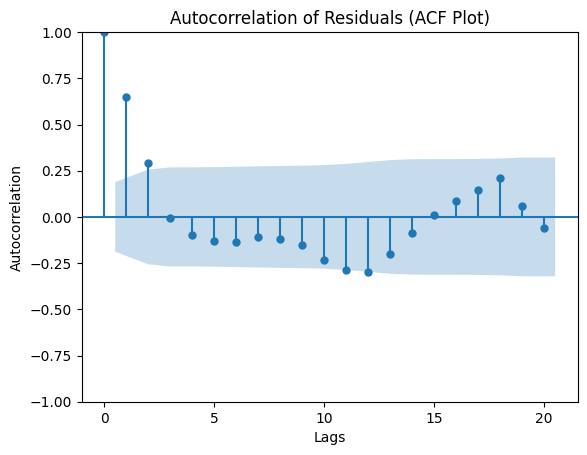

In [32]:
independence(model)

### Diagnostics Conclusion

In [33]:
print(analysis.head())

                          University Gender  Year  Completions
0  University of California-Berkeley    Men  2017          453
1  University of California-Berkeley    Men  2018          465
2  University of California-Berkeley    Men  2019          592
3  University of California-Berkeley    Men  2020          897
4  University of California-Berkeley    Men  2021          956


We can see according to the diagnostics above, our regression model fails every diagnostic. This may be because our response variable of majors that include the word "computer" in it has too much variability due to the small amount of data that have a "Computer" major as we see above. The "Computer" major may also have a non-linear relationship to a lot of the covariates. We should use a response variable that is more stable and has more data. What if we tried using every **STEM major** as our response variable?

## Impacts of gender, the year, and the University on STEM Major Completions

In [46]:
def label_field(major):
    major_lower = major.lower()
    stem_keywords = ['math', 'biology', 'physics', 'chemistry', 'computer', 'engineering']
    
    if any(keyword in major_lower for keyword in stem_keywords):
        return 'STEM Major'
    else:
        return 'Other'

df['Field'] = df['Major'].apply(label_field)

df_stem = df[df['Field'] == 'STEM Major'].copy()
analysis = df_stem.groupby(
    ['University', 'Gender', 'Year'],
    as_index = False
)['Completions'].sum()

model = smf.ols(formula='Completions ~ C(University, Treatment("University of California-San Diego (110680)")) + C(Gender) + Year', data=analysis).fit()

### Diagnostics

**Noramlity**

In [47]:
normality(model)

Fail to reject H0, the data is likely normally distributed (p-value=0.4385862202176716, alpha = 0.05)


**Heteroscedasticity and Linearity**

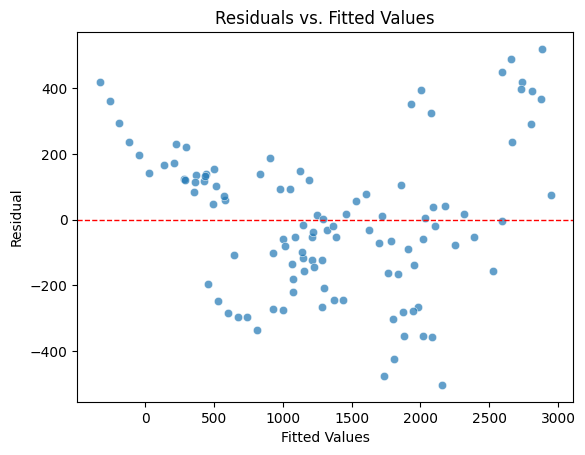

In [48]:
hetro_and_linear(model)

**Independence**

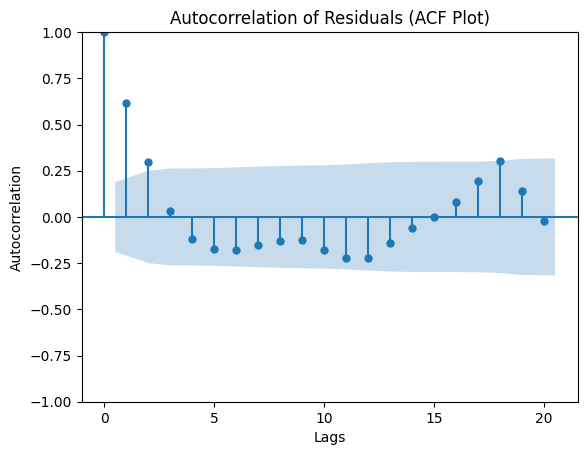

In [49]:
independence(model)

### Diagnostics Conclusion

According to our diagnostics above, our OLS model satifies every assumption except for independence. For the Shapiro-Wilk test, we obtained a p-value of around 0.43 meaning we fail to reject the null hypothesis according to our selected alpha value of 0.05. This means our residuals are most likely normally distributed. In the residuals vs. fitted values plot, we can see that there is no pattern forming and thus our errors have constant variance and our independent and dependent variables are linear.

We can see that in the ACF plot, we see at some lags, there is a positive correlation.

In the future, we can use a different model other than OLS to better model our data such as ARIMA since our data is time dependent to satisfy this independence assumption.

### Regression Analysis

In [50]:
print(analysis.head())

                          University Gender  Year  Completions
0  University of California-Berkeley    Men  2017         2368
1  University of California-Berkeley    Men  2018         2592
2  University of California-Berkeley    Men  2019         2903
3  University of California-Berkeley    Men  2020         3159
4  University of California-Berkeley    Men  2021         3202


**Much more data to work with!**

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Completions   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     127.4
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           3.40e-51
Time:                        11:57:22   Log-Likelihood:                -737.61
No. Observations:                 108   AIC:                             1497.
Df Residuals:                      97   BIC:                             1527.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

**Every covariate is statstically significant except for UCB** as UCB's p-value is greater than 0.05.

## Interpretation